In [122]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

#Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#Machine Learning
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import catboost as cb

#Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

#HyperParameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# F2 score for gridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

## 데이터 준비

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
t_data = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/telecom_customer_churn.csv', encoding='euc-kr',engine='python')
t_data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

# ** 마케팅 전략을 위한 이탈 손님 정보 정리

In [35]:
churned_info = t_data[t_data['Customer Status'] == 'Churned']
churned_info.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer


In [36]:
churned_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7039
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        1869 non-null   object 
 1   Gender                             1869 non-null   object 
 2   Age                                1869 non-null   int64  
 3   Married                            1869 non-null   object 
 4   Number of Dependents               1869 non-null   int64  
 5   City                               1869 non-null   object 
 6   Zip Code                           1869 non-null   int64  
 7   Latitude                           1869 non-null   float64
 8   Longitude                          1869 non-null   float64
 9   Number of Referrals                1869 non-null   int64  
 10  Tenure in Months                   1869 non-null   int64  
 11  Offer                              1869 non-null   objec

# 1. 전처리

## 1-1. 결측치 처리
- 결측치를 다른 값으로 대체할 수 있는 방안을 찾아야 할 것 같지만
- 여기서는 편의를 위해 우선 결측치를 제거하는 방법을 사용함

- t_data에서 결측치가 가장 많은 컬럼은 Churn Category, Churn Reason인데 이는 전부 이탈한 사람들의 정보이므로 이 두 컬럼을 제외한 나머지에 대해 전처리 진행

In [38]:
t_data = t_data.iloc[:, 1:36].dropna(axis=0)
t_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [39]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7041
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4835 non-null   object 
 1   Age                                4835 non-null   int64  
 2   Married                            4835 non-null   object 
 3   Number of Dependents               4835 non-null   int64  
 4   City                               4835 non-null   object 
 5   Zip Code                           4835 non-null   int64  
 6   Latitude                           4835 non-null   float64
 7   Longitude                          4835 non-null   float64
 8   Number of Referrals                4835 non-null   int64  
 9   Tenure in Months                   4835 non-null   int64  
 10  Offer                              4835 non-null   object 
 11  Phone Service                      4835 non-null   objec

## 1-2. 라벨인코더 사용

- 이탈을 할지 안할지를 예측하는 이진분류의 문제이므로 Customer Status 컬럼의 값 중 joined와 stayed를 합침

In [40]:
t_data['Customer Status'].value_counts() # "Joined"는 해당 분기에 신규 가입한 고객

Stayed     3015
Churned    1586
Joined      234
Name: Customer Status, dtype: int64

In [41]:
t_data['Churned'] = t_data['Customer Status'].replace({'Churned': 'yes', 'Joined': 'no', 'Stayed': 'no'})
t_data['Churned'].value_counts()

no     3249
yes    1586
Name: Churned, dtype: int64

In [43]:
le = LabelEncoder()

t_data['target'] = le.fit_transform(t_data['Churned'])

t_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churned,target
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,no,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,no,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,yes,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,yes,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,yes,1


In [46]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7041
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4835 non-null   object 
 1   Age                                4835 non-null   int64  
 2   Married                            4835 non-null   object 
 3   Number of Dependents               4835 non-null   int64  
 4   City                               4835 non-null   object 
 5   Zip Code                           4835 non-null   int64  
 6   Latitude                           4835 non-null   float64
 7   Longitude                          4835 non-null   float64
 8   Number of Referrals                4835 non-null   int64  
 9   Tenure in Months                   4835 non-null   int64  
 10  Offer                              4835 non-null   object 
 11  Phone Service                      4835 non-null   objec

# ** monthly charge가 높은 사람들(이탈 방지 핵심 고객) 한정 데이터 정리
- monthly charge가 평균보다 높은 사람들을 기준
- hc : highly charged
- 결측치를 제거한 데이터 프레임 내에서 이탈 방지 핵심 고객을 중심으로 분석할 때를 대비한 hc_t_data 데이터 프레임 준비

In [51]:
hc_t_data = t_data[t_data['Monthly Charge'] > t_data['Monthly Charge'].mean()]
hc_t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 3 to 7039
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2581 non-null   object 
 1   Age                                2581 non-null   int64  
 2   Married                            2581 non-null   object 
 3   Number of Dependents               2581 non-null   int64  
 4   City                               2581 non-null   object 
 5   Zip Code                           2581 non-null   int64  
 6   Latitude                           2581 non-null   float64
 7   Longitude                          2581 non-null   float64
 8   Number of Referrals                2581 non-null   int64  
 9   Tenure in Months                   2581 non-null   int64  
 10  Offer                              2581 non-null   object 
 11  Phone Service                      2581 non-null   objec

# 2. EDA

## 2-1. 특성별 빈도수 파악

In [58]:
t_data.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churned', 'target'],
      dtype='object')

In [59]:
t_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churned,target
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,no,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,no,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,yes,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,yes,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,yes,1


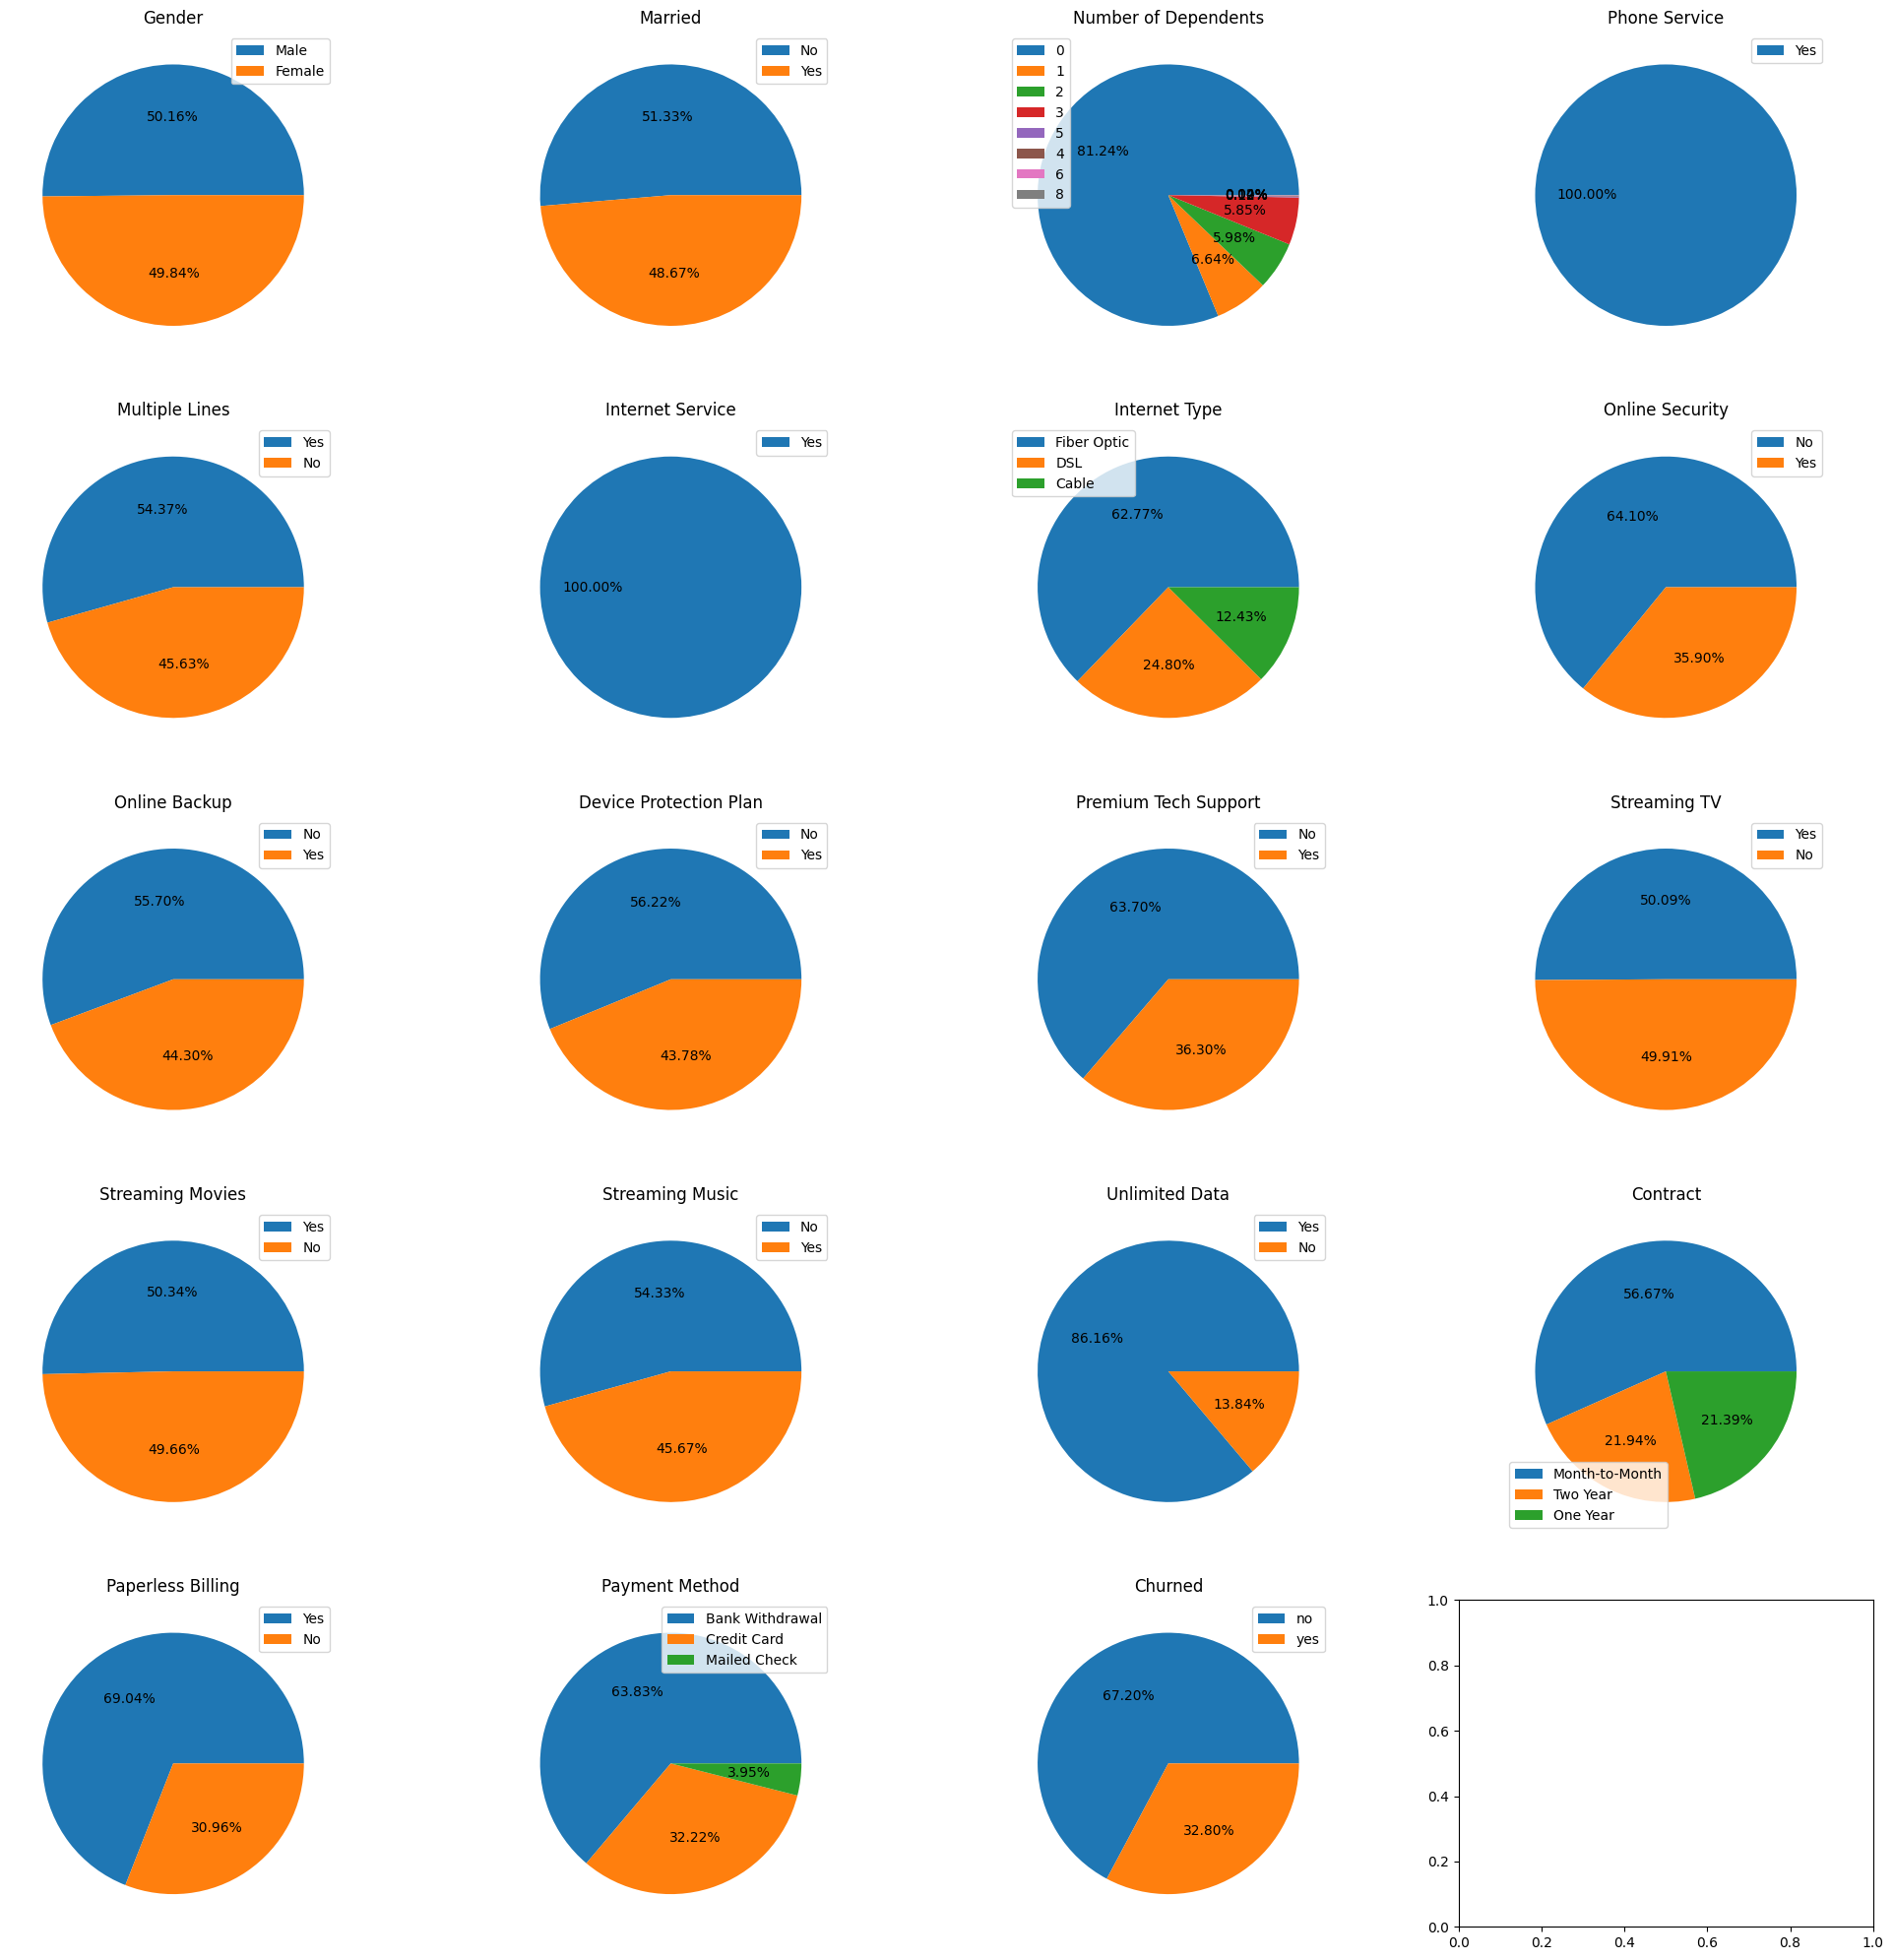

In [62]:
import math

columns = ['Gender', 'Married', 'Number of Dependents', 'Phone Service','Multiple Lines',  'Internet Service',
           'Internet Type','Online Security',  'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
           'Streaming Movies','Streaming Music','Unlimited Data', 'Contract',  'Paperless Billing', 'Payment Method', 'Churned'
           ]

f, axes = plt.subplots(5,4, figsize=(25,25))

for col, ax in zip(columns, axes.ravel()):
        data = t_data[col].value_counts().values.tolist()
        labels = t_data[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')

 --> phone service, internet service는 모든 고객이 다 사용하고 있으므로 이탈률을 예측하는 데에 크게 영향을 주지 않으므로 제거

## 2-2. 특성별 이탈율 파악

#### 2-2-1. 카테고리형

In [67]:
t_data.groupby('Gender')['target'].mean().reset_index()

,Gender,target
0,Female,0.333195
1,Male,0.322887


In [95]:
columns = ['Gender', 'Married', 'Number of Dependents','Multiple Lines',
           'Internet Type','Online Security',  'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
           'Streaming Movies','Streaming Music','Unlimited Data', 'Contract',  'Paperless Billing', 'Payment Method'
           ]

In [96]:
import plotly.graph_objects as go
import plotly.offline as pyoff

def cat_plot(col):

    df_plot = t_data.groupby(col).target.mean().reset_index()

    plot_data = go.Bar(x = df_plot[col],
                       y = df_plot['target'],
                       width = 0.5,
                       marker=dict(color=['green','blue','orange','red']))

    plot_layout = go.Layout(xaxis = {'type':'category'},
                            yaxis = {'title':'Churn Rate'},
                            title = col,
                            plot_bgcolor = 'rgb(243,243,243)',
                            paper_bgcolor = 'rgb(243,243,243)')

    fig = go.Figure(data = plot_data,layout = plot_layout)
    pyoff.iplot(fig)

for i in columns:
    cat_plot(i)

#### 2-2-2. 연속형

In [102]:
def num_plot(cols):

    df_plot = t_data.groupby(cols).target.mean().reset_index()

    plot_data = go.Scatter(x = df_plot[cols],
                           y = df_plot['target'],
                           mode = 'markers',
                           marker = dict(size = 7,
                                        line= dict(width=1),
                                        color = 'blue',
                                        opacity = 0.8 ))

    plot_layout = go.Layout(xaxis = {'title':cols},
                            yaxis = {'title':'target'},
                            title = cols + ' based Churn rate',
                            plot_bgcolor = 'rgb(243,243,243)',
                            paper_bgcolor = 'rgb(243,243,243)')

    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)


columns = ['Age', 'Tenure in Months', 'Avg Monthly GB Download',
           'Monthly Charge', 'Total Charges', 'Total Extra Data Charges']

for i in columns:
    num_plot(i)

- --> total charges, monthly charge
- --> 위의 칼럼들은 해당 그래프로 양상이나 추세가 보이지 않음

## 2-3. 상관관계 행렬

In [103]:
col = ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'target']

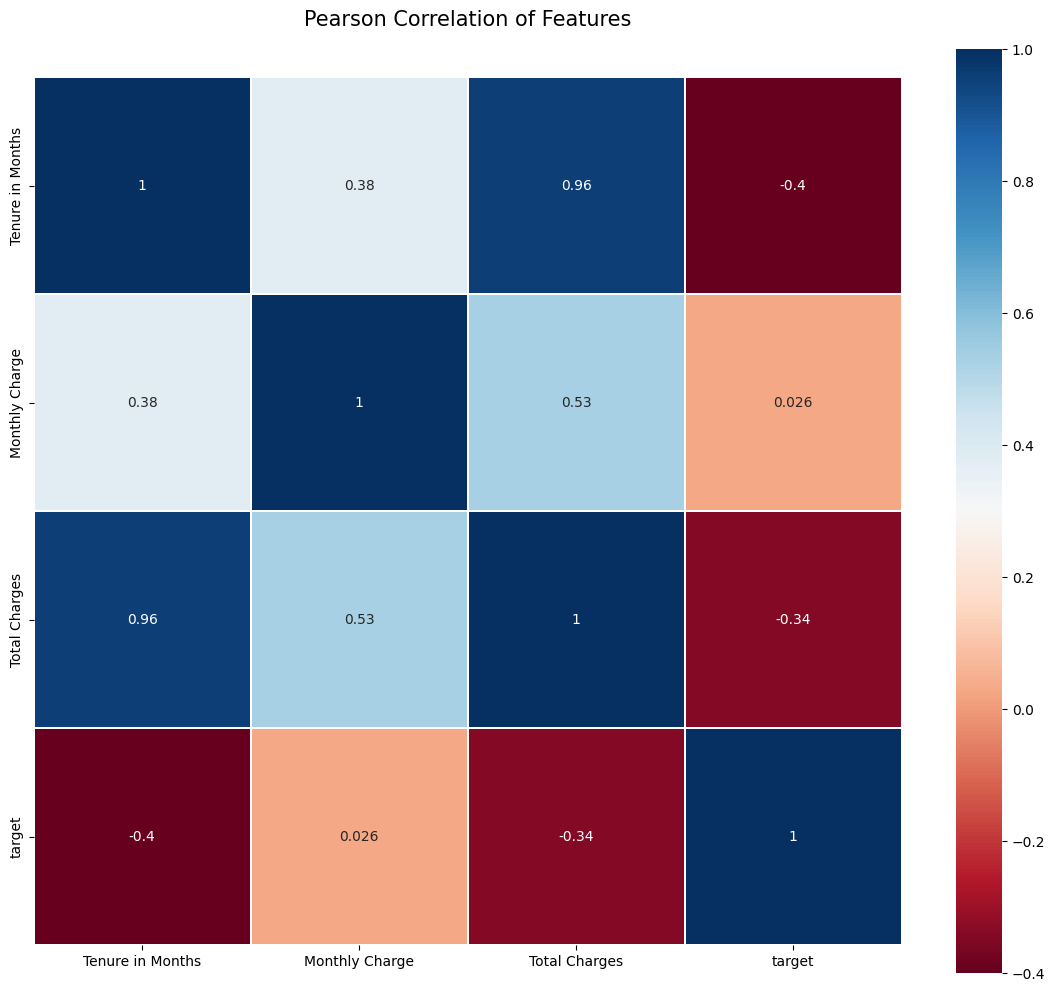

In [104]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(t_data[col].corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True);

In [105]:
t_data[col].corr()

,Tenure in Months,Monthly Charge,Total Charges,target
Tenure in Months,1.000000,0.381184,0.957944,-0.401050
Monthly Charge,0.381184,1.000000,0.534464,0.026117
Total Charges,0.957944,0.534464,1.000000,-0.341946
target,-0.401050,0.026117,-0.341946,1.000000


- --> tenure in months : 음의 상관관계
- --> total charges : 양의 상관관계
- --> monthly charge : 양의 상관관계이나 total charges 보다는 값이 작음

# 3. 특성공학

## 3-1. 연속형 데이터 스케일링 - tenure, monthly, total charges - MinMax

#### tenure

In [108]:
tenu = np.array(t_data['Tenure in Months']).reshape(-1,1)
scaler = MinMaxScaler()
a = scaler.fit_transform(tenu)
t_data['Tenure in Months'] = a

#### Monthly Charges

In [110]:
monthly = np.array(t_data['Monthly Charge']).reshape(-1,1)
scaler = MinMaxScaler()
a = scaler.fit_transform(monthly)
t_data['Monthly Charge'] = a

#### Total Charges

In [113]:
total = np.array(t_data['Total Charges']).reshape(-1,1)
scaler = MinMaxScaler()
a = scaler.fit_transform(total)
t_data['Total Charges'] = a

## 3-2. 원 핫 인코딩

In [114]:
t_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churned,target
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,0.112676,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,0.587184,0.063690,0.00,0,381.51,974.81,Stayed,no,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,0.112676,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,0.046602,0.057800,38.33,10,96.21,610.28,Stayed,no,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,0.042254,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.651650,0.027534,0.00,0,134.60,415.45,Churned,yes,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,0.169014,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.838835,0.138274,0.00,0,361.66,1599.51,Churned,yes,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,0.028169,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,0.729320,0.025978,0.00,0,22.14,289.54,Churned,yes,1


In [117]:
t_data = t_data[['Gender', 'Age', 'Married', 'Tenure in Months', 'Offer','Internet Type', 'Avg Monthly GB Download',\
                 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',\
                 'Streaming Movies','Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',\
                 'Total Charges','target']]

In [118]:
t_data_dummies = t_data.drop(['target'] ,axis=1)
t_data_dummies = pd.get_dummies(t_data_dummies)
t_data_dummies['target'] = t_data['target']

# 4. 모델링

In [119]:
data = t_data_dummies.drop('target',axis=1)
target = t_data_dummies.target

seed = 13
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = seed)

## 4-1. 로지스틱, DT 모델 학습 및 예측

In [135]:
model = LogisticRegression().fit(X_train, y_train)

y_pre = model.predict(X_test)

In [136]:
probs = model.predict_proba(X_test)
y_probs = probs[:, 1]

#### 4-1-2. 모델 평가 (Validation set) 지표

##### - 지표 1. 정확도, 정밀도, 재현율, F1 점수

In [120]:
model_box = pd.DataFrame(columns=['logistic','xgboost','lightgbm','catboost'],
                         index = ['accuracy','precision','recall','f1 score','f1.5 score','f2 score','pr_auc','roc_auc'])

In [123]:
def f_score(beta, y_real, y_pred):
    beta = beta
    pr = precision_score(y_real, y_pred)
    re = recall_score(y_real, y_pred)
    score = (1+beta**2)*(pr*re)/((beta**2*pr)+re)
    return score

In [124]:
def evaluate(y_real, y_pred, y_prob):

    acc = accuracy_score(y_real, y_pred)
    pre = precision_score(y_real, y_pred)
    rec = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    f2 = f_score(1.5,y_real, y_pred)
    f3 = f_score(2,y_real, y_pred)
    auc1 = average_precision_score(y_real, y_prob)
    auc2 = roc_auc_score(y_real, y_prob)

    print('Accuracy : {:.6f}'.format(acc)) #정확도 : 예측이 정답과 얼마나 정확한가
    print('Precision : {:.6f}'.format(pre)) #정밀도 : 예측한 것 중에서 정답의 비율
    print('Recall : {:.6f}'.format(rec)) #재현율 : 정답 중에서 예측한 것의 비율
    print('F1 score : {:.6f}'.format(f1)) #정밀도와 재현율의 (조화)평균 - 정밀도와 재현율이 비슷할수록 높은 점수
    print('F1.5 score : {:.6f}'.format(f2))
    print('F2 score : {:.6f}'.format(f3))
    print('PR curve_auc score : {:.6f}'.format(auc1))
    print('ROC curve_auc score : {:.6f}'.format(auc2))
    print('\nConfusion Matrix : \n {}'.format(confusion_matrix(y_real, y_pred, labels = [1,0]))) # labels를 설정해주지 않으면 순서가 바뀜

    score_list = [acc,pre,rec,f1,f2,f3,auc1,auc2]
    score_box = np.array(score_list)

    return score_box

In [125]:
def graph_f_score(i,j,k,y_real,y_pred):

    x_range = np.arange(i,j,k)
    score = []

    for kk in x_range:
        score.append(f_score(kk,y_real,y_pred))

    score = np.array(score)
    plt.figure(figsize=(10,5))
    plt.plot(x_range, score,'-o')
    plt.title('F-score by weight')
    plt.xlabel('weight')
    plt.ylabel('f-score')

##### - 지표 2. 정밀도, 재현율, 임계값 그래프

In [126]:
def precision_recall_thresholds(y_val, y_prob):

    precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)
    plt.figure(figsize = (15,5))
    plt.plot(thresholds, recalls[:-1], color = 'red', label = 'recall')
    plt.plot(thresholds, precisions[:-1], color = 'blue', label = 'precision')
    plt.title('thresholds VS recalls VS precisions')
    plt.xlabel('thresholds')
    plt.legend(loc = 'best')

##### - 지표 3. 정밀도-재현율 곡선

In [127]:
def plot_pr_curve(y_val, y_prob):

    precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)
    pr_auc = average_precision_score(y_val, y_prob)
    plt.title('Precision-Recall Curve')
    plt.plot(recalls, precisions, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    b_line = len(y_val[y_val==1]) / len(y_val)
    plt.plot([0, 1], [b_line, b_line], "r--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

##### - 지표 4. ROC 곡선

- 양성과 음성의 판단 중요도가 비슷할 경우 사용
- ex. 개와 고양이 분류
- 모든 threshold에 대해 얼마나 잘 예측하는지에 대한 곡선
- 하나의 값으로 비교하기 위해 AUC 개념 도입

In [128]:
def plot_roc_curve(y_val, y_prob):

    fpr, tpr, threshold = roc_curve(y_val, y_prob)
    roc_auc = roc_auc_score(y_val, y_prob)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### 4-1-3. 최적의 매개변수 구하기

In [130]:
# beta=2인 f score로 최적의 매개변수 찾기

f_scorer = make_scorer(fbeta_score, beta = 1.5)

In [131]:
# 그리드서치 스코어 기준
cri_score = f_scorer

In [134]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, solver=solver)

grid = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid, scoring=cri_score, verbose=1, n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)

print('Gridsearch by using AUC')
print('best parameter : {}'.format(grid.best_params_))
print('best AUC score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best AUC score of test set : {:.3f}'.format(grid.score(X_test,y_test))) # 최적의 매개변수와 전체 train 데이터로 만든 모델로 평가한 점수

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Gridsearch by using AUC
best parameter : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best AUC score of CV : 0.647
best AUC score of test set : 0.662


#### 4-1-4. 테스트

In [ ]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

model_box['logistic'] = evaluate(y_test, y_pred, y_prob)

Accuracy : 0.766565
Precision : 0.673913
Recall : 0.694678
F1 score : 0.684138
F1.5 score : 0.688154
F2 score : 0.690423
PR curve_auc score : 0.700603
ROC curve_auc score : 0.828591

Confusion Matrix : 
 [[248 109]
 [120 504]]


#### 4-1-5. 특성 중요도

In [139]:
model.coef_

array([[ 0.01220067, -1.03366112, -0.00471821,  0.46746814, -0.34806775,
        -0.11494229, -0.14570896, -0.06975405, -0.1908972 ,  0.01536937,
         0.56691234, -0.3618069 , -0.20528721, -0.50071138,  0.22487253,
        -0.08425246, -0.51345023,  0.33705144,  0.12329646, -0.38394771,
        -0.0456329 , -0.21501834, -0.09503143, -0.16561982,  0.06890439,
        -0.32955564, -0.25742707, -0.00322418, -0.09468318, -0.16596807,
        -0.37680949,  0.11615824, -0.05221189, -0.20843936,  1.12718038,
         0.02071688, -1.40854851, -0.32001132,  0.05936007, -0.14005556,
        -0.55701075,  0.43641507]])

In [140]:
importance = model.coef_[0]

df = pd.DataFrame(data=importance, index=X_train.columns, columns=['importance'])
df = df.sort_values(by='importance')

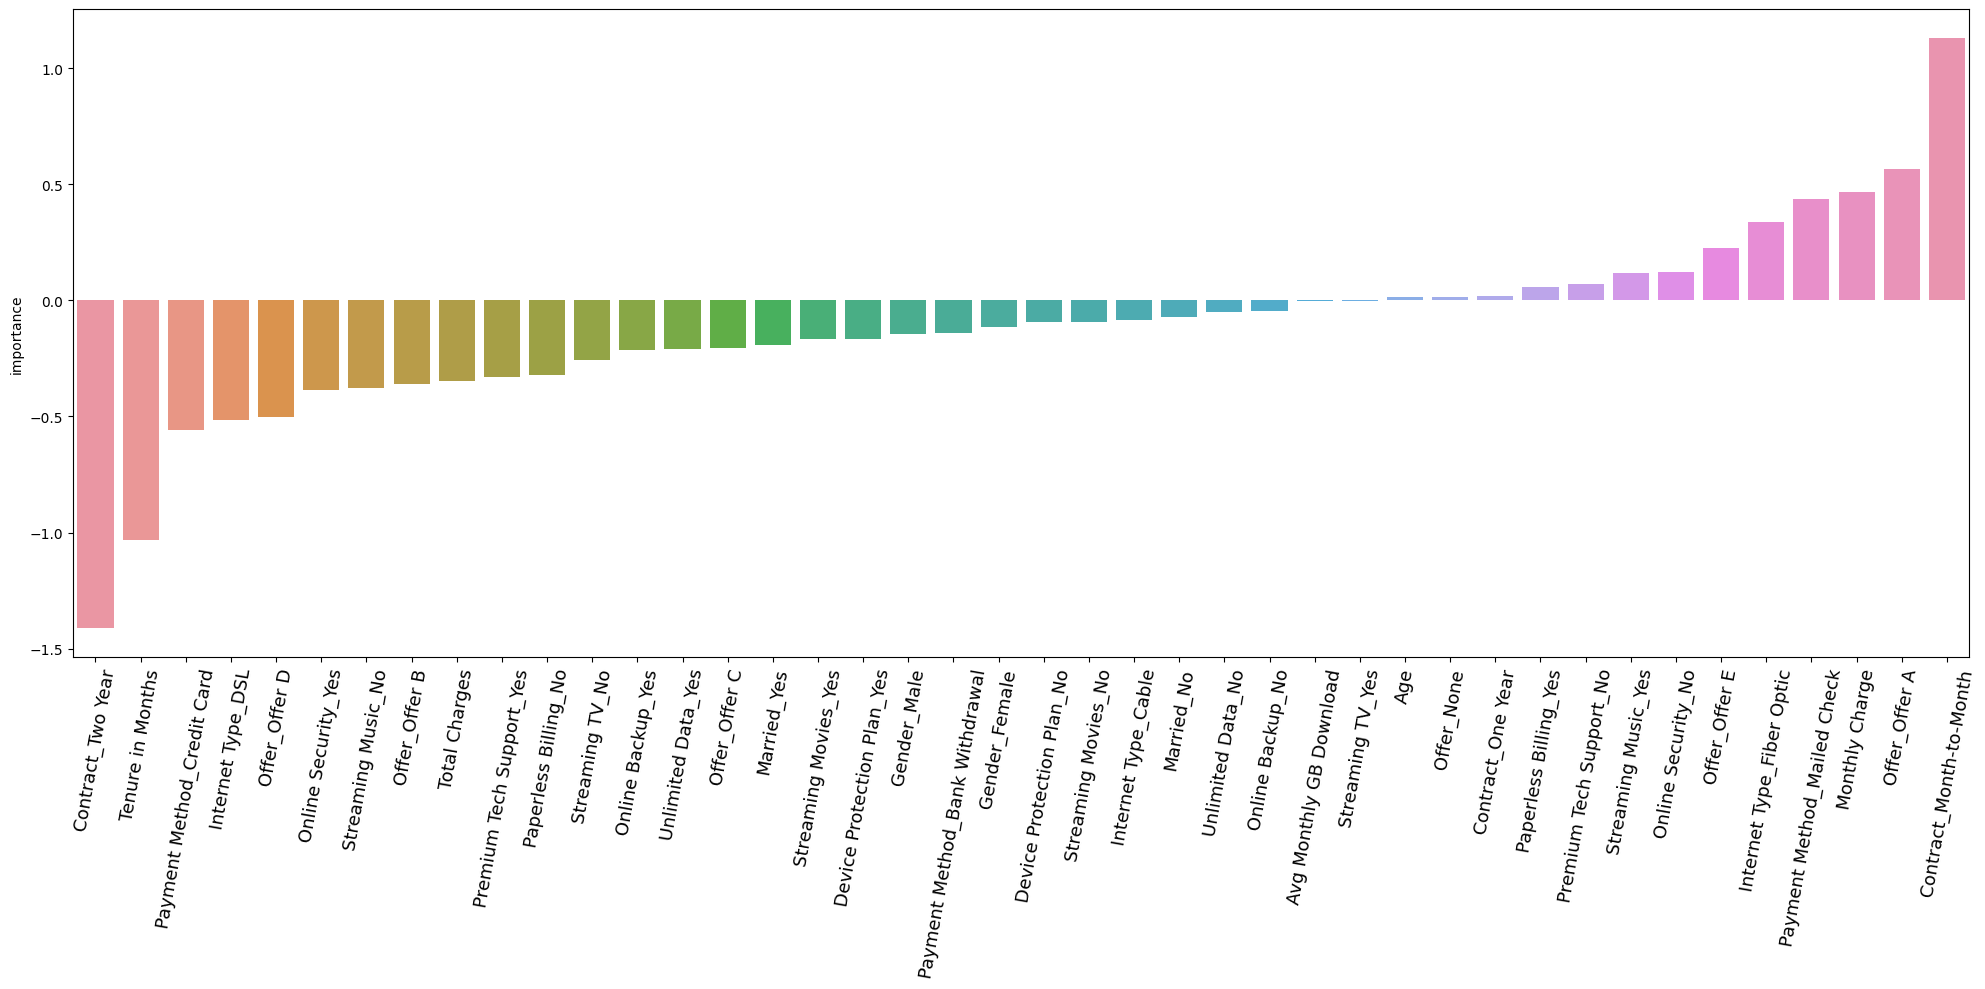

In [142]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x = df.index, y = df.importance)
ax.set_xticklabels(df.index,rotation=80,fontsize=13)
plt.tight_layout()
plt.show()

## Decision Tree

In [145]:
X_train.head()

,Age,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Total Charges,Gender_Female,Gender_Male,Married_No,Married_Yes,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Device Protection Plan_No,Device Protection Plan_Yes,Premium Tech Support_No,Premium Tech Support_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
5216,24,0.042254,51.0,0.471456,0.019863,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0
2231,57,0.028169,17.0,0.704466,0.022744,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0
2154,28,0.140845,48.0,0.691262,0.102570,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
5895,55,0.253521,23.0,0.504854,0.116132,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
1101,47,0.154930,13.0,0.427184,0.055711,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz #그래프 시각화

In [147]:
def plot_decision_tree(columns, maximum_depth, criterion_type, split_type):

    #preparing data
    columns = ['Tenure in Months','Monthly Charge','Total Charges']
    dt_train = X_train[columns]
    dt_test = X_test[columns]

    #modeling
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth, splitter = split_type, criterion = criterion_type)
    model = dt_classifier.fit(dt_train, y_train)

    #evaluation
    y_pre = model.predict(dt_test)
    probs = model.predict_proba(dt_test)
    y_prob = probs[:,1]
    evaluate(y_test, y_pre, y_prob)

    # 특성중요도
    plt.figure(figsize = (10,5))
    plt.barh(range(3),model.feature_importances_, align='center')
    plt.title('Feature Importances')
    plt.yticks(np.arange(3),columns)
    plt.ylabel('features')
    plt.xlabel('importances')

Accuracy : 0.727047
Precision : 0.699074
Recall : 0.362981
F1 score : 0.477848
F1.5 score : 0.425998
F2 score : 0.401596
PR curve_auc score : 0.630134
ROC curve_auc score : 0.791570

Confusion Matrix : 
 [[151 265]
 [ 65 728]]


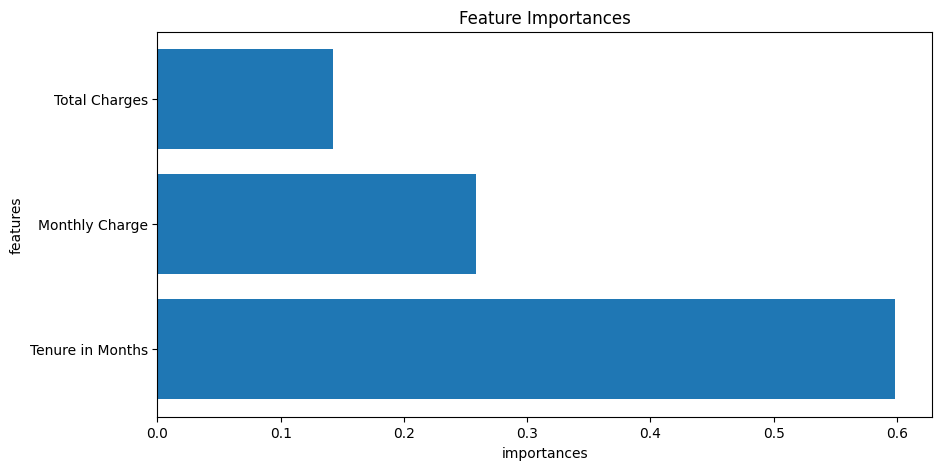

In [148]:
plot_decision_tree(col, 4, 'entropy', 'best')


## 4-2. XGBOOST

파라미터
- *booster : 어떤 부스터를 쓸건지 [ 'gbtree'(d),'gblinear','dart' ]
- *learning_rate(eta) : 0.01~0.2 사이값 [0.3(d)]
- *num_iterations : 나무 부스팅을 몇번 할 것인가, 1000이상 권장 [100(d)]
- early_stopping_rounds : 몇 번 동안 validation 셋에 발전이 없어야 그만둘건지
- num_feature : feature 차원의 숫자를 정해야하는 경우, 가능한 많이(d)
- *max_depth : 나무 깊이를 얼만큼 할건지, 3-10 권장 [6(d)]
- num_leaves : 그 트리가 가질 수 있는 잎사귀 수
- bagging_fraction(subsample) : 행 샘플링, 다양성 높인다
- feature_fraction(colsample) : 열 샘플링, 다양성을 높인다, 0.5~0.9 권장 [1(d):샘플링X]
- lambda : L2 규제에 달리는 가중치, 클수록 보수적
- alpha : L1 규제에 달리는 가중치, 클수록 보수적
- objective : 목적함수 ['reg:linear'선형회귀(d),'binary:logistic'이진분류,'count:poisson','multi:softprob'..]
- *eval_metric : 모델의 평가함수 조정 ['rmse','mae','logloss''auc','map'(mean average precision'..]
- min_child_weight : leaf 노드로 인정되는 최소 샘플 수 [1(d)]

특징

- plot_importance를 통해 feature importance 확인가능

#### 4-2-1. 학습 및 예측

In [149]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                              objective = 'binary:logistic',
                              eval_metric = 'error',
                              seed= seed)

model = xgb_model.fit(X_train, y_train)

y_pre = model.predict(X_test)

In [150]:
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

#### 4-2-2. 모델 평가 (Validation set) 지표

##### - 지표 1. 정확도, 정밀도, 재현율, F1 점수

Accuracy : 0.791563
Precision : 0.712435
Recall : 0.661058
F1 score : 0.685786
F1.5 score : 0.676059
F2 score : 0.670732
PR curve_auc score : 0.769424
ROC curve_auc score : 0.859816

Confusion Matrix : 
 [[275 141]
 [111 682]]


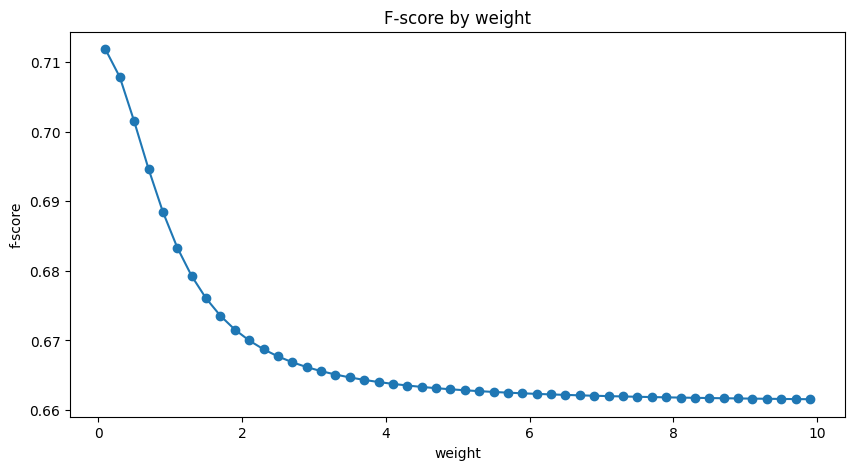

In [151]:
evaluate(y_test,y_pre,y_prob)
graph_f_score(0.1,10,0.2,y_test,y_pre)

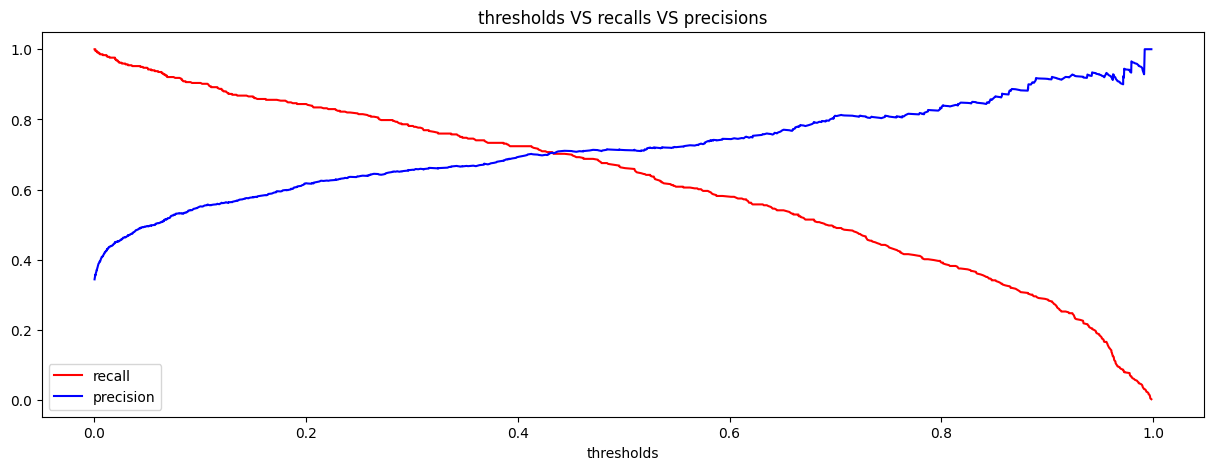

In [152]:
precision_recall_thresholds(y_test, y_prob)

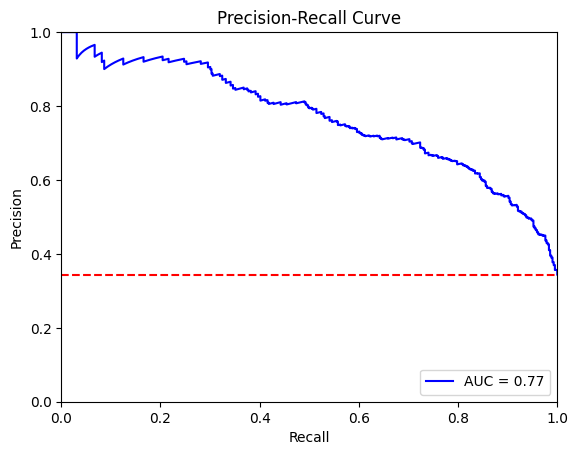

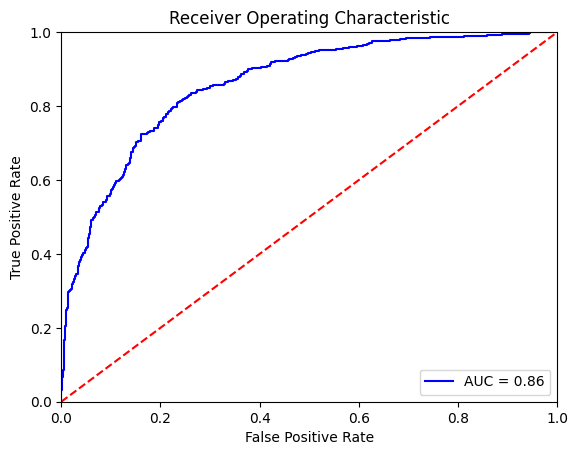

In [153]:
plot_pr_curve(y_test, y_prob)
plot_roc_curve(y_test, y_prob)

#### 4-2-3. 최적의 매개변수 구하기

In [ ]:
param_grid = {'booster': ['gbtree'],
              'objective' : ['binary:logistic'],
              'eval_metric' : ['error'],
              'n_estimators':[100],
              'max_depth': [3,5,7,9],
              'min_child_weight':[1,3,5,7],
              'learning_rate' : [0.01,0.05,0.1],
              'scale_pos_weight':[1,3,5],
              'colsample_bytree':[0.5,0.7,0.9]}

grid = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid=param_grid, scoring=cri_score, verbose=1, n_jobs=-1, cv=5,)

grid_result = grid.fit(X_train, y_train)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test))) # 최적의 매개변수와 전체 train 데이터로 만든 모델로 평가한 점수

#### 4-2-4. 테스트

In [ ]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

model_box['xgboost'] = evaluate(y_test, y_pred, y_prob)

Accuracy : 0.668705
Precision : 0.525559
Recall : 0.921569
F1 score : 0.669379
F1.5 score : 0.748120
F2 score : 0.800876
PR curve_auc score : 0.722972
ROC curve_auc score : 0.829381

Confusion Matrix : 
 [[329  28]
 [297 327]]


#### 4-2-5. 특성중요도

- weight(d) : 모든 트리에서 각 feature가 데이터를 분할하는데 사용된 횟수
- cover : weight개념에서 훈련데이터 개수에 따라 가중치를 적용받은 것
- gain : 분할에 각 변수를 사용할때마다 감소한 평균 훈련 손실

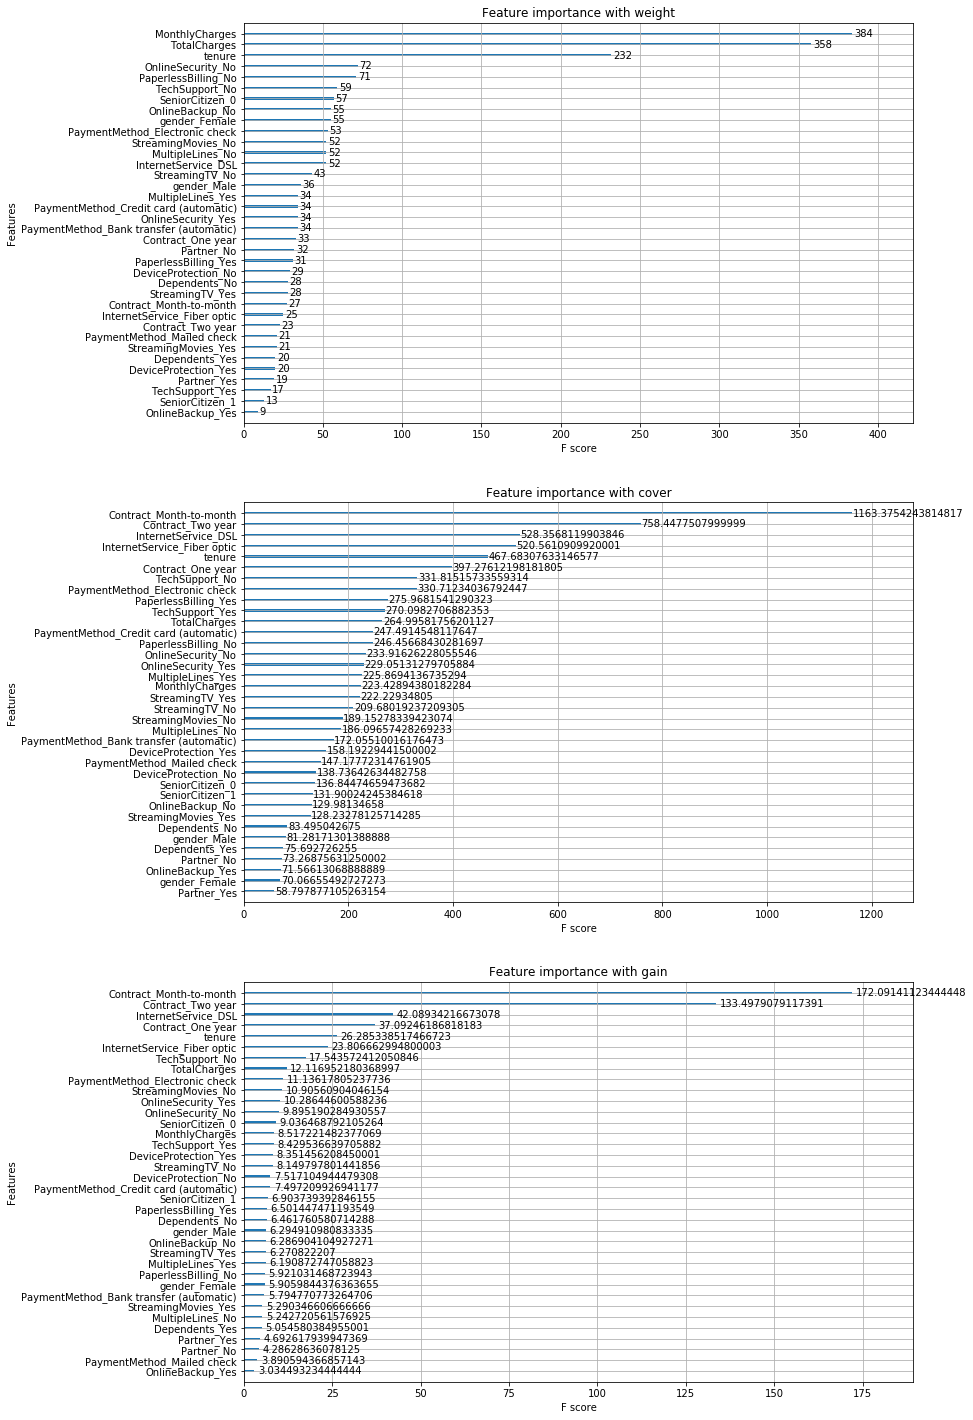

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (12,25))
for i, type_ in enumerate(['weight','cover','gain']):
    xgb.plot_importance(grid_result.best_estimator_,importance_type = type_, ax=ax[i])
    ax[i].set_title('Feature importance with '+type_)

## 4-3. LightGBM

#### 4-3-1. 학습 및 예측

In [ ]:
lgb_model = lgb.LGBMClassifier(booster = 'gbtree',
                               objective = 'binary',
                               seed= seed)

model = lgb_model.fit(X_train, y_train)
y_pre = model.predict(X_test)

In [ ]:
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

#### 4-3-2. 모델 평가 (Validation set) 지표

##### - 지표 1. 정확도, 정밀도, 재현율, F1 점수

Accuracy : 0.742857
Precision : 0.607759
Recall : 0.589958
F1 score : 0.598726
F1.5 score : 0.595323
F2 score : 0.593434
PR curve_auc score : 0.646020
ROC curve_auc score : 0.788994

Confusion Matrix : 
 [[141  98]
 [ 91 405]]


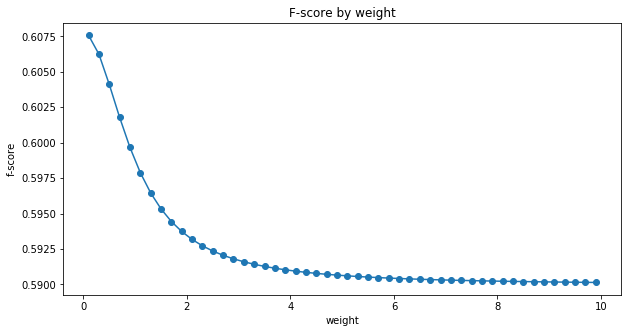

In [ ]:
evaluate(y_test, y_pre, y_prob)
graph_f_score(0.1, 10, 0.2, y_test, y_pre)

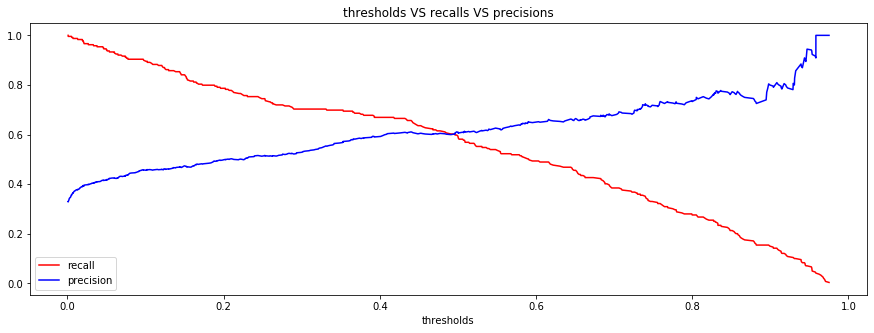

In [ ]:
precision_recall_thresholds(y_test, y_prob)

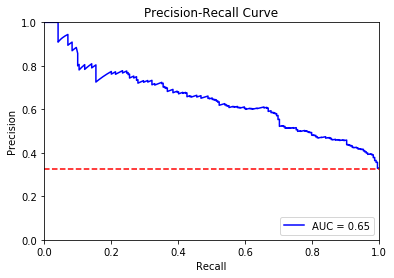

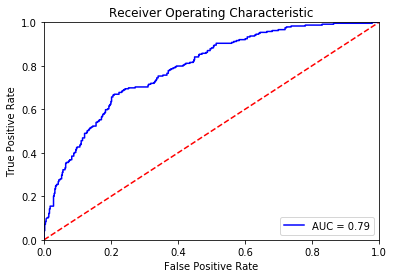

In [ ]:
plot_pr_curve(y_test, y_prob)
plot_roc_curve(y_test, y_prob)

#### 4-3-3. 최적의 매개변수 구하기

In [ ]:
param_grid = {'booster': ['gbtree'],
             'objective' : ['binary'],
             'learning_rate':[0.01,0.05,0.1],
              'num_leaves' : [12,15,18],
              'feature_fraction' : [0.5,0.7,0.9],
              'subsample' : [0.5,0.7,0.9],
              'min_child_weight':[1,3,5,7]
             }

grid = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid=param_grid, scoring=cri_score, verbose=1, n_jobs=-1, cv=5,)

grid_result = grid.fit(X_train, y_train)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test))) # 최적의 매개변수와 전체 train 데이터로 만든 모델로 평가한 점수

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   40.9s


best parameter : {'booster': 'gbtree', 'feature_fraction': 0.7, 'learning_rate': 0.05, 'min_child_weight': 5, 'num_leaves': 12, 'objective': 'binary', 'subsample': 0.5}
best score of CV : 0.639
best score of test set : 0.637


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   54.9s finished


#### 4-3-4. 테스트

In [ ]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

model_box['lightgbm'] = evaluate(y_test, y_pred, y_prob)

Accuracy : 0.758410
Precision : 0.687500
Recall : 0.616246
F1 score : 0.649926
F1.5 score : 0.636546
F2 score : 0.629291
PR curve_auc score : 0.726989
ROC curve_auc score : 0.832229

Confusion Matrix : 
 [[220 137]
 [100 524]]


#### 4-3-5. 특성중요도

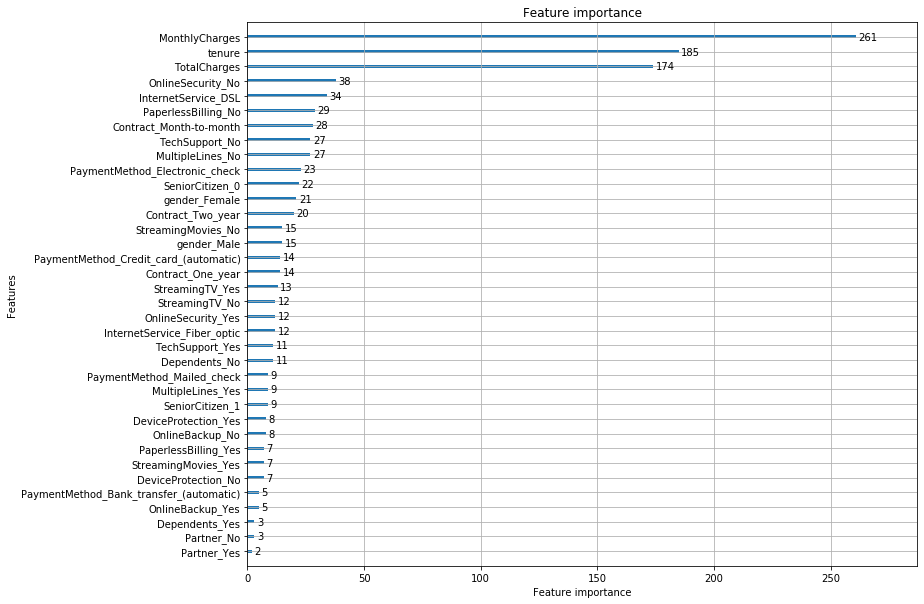

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (12,10))
lgb.plot_importance(grid_result.best_estimator_, ax=ax)

## Catboost

#### 4-4-1. 학습 및 예측

In [156]:
X_train.head()

,Age,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Total Charges,Gender_Female,Gender_Male,Married_No,Married_Yes,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Device Protection Plan_No,Device Protection Plan_Yes,Premium Tech Support_No,Premium Tech Support_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
5216,24,0.042254,51.0,0.471456,0.019863,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0
2231,57,0.028169,17.0,0.704466,0.022744,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0
2154,28,0.140845,48.0,0.691262,0.102570,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
5895,55,0.253521,23.0,0.504854,0.116132,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
1101,47,0.154930,13.0,0.427184,0.055711,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0


In [157]:
cat_features = list(X_train.columns[5:])

In [158]:
cb_model = cb.CatBoostClassifier()
model = cb_model.fit(X_train, y_train,cat_features = cat_features)
y_pre = model.predict(X_test)

Learning rate set to 0.017857
0:	learn: 0.6833652	total: 57.1ms	remaining: 57.1s
1:	learn: 0.6735688	total: 66.2ms	remaining: 33s
2:	learn: 0.6648175	total: 71ms	remaining: 23.6s
3:	learn: 0.6562719	total: 75.8ms	remaining: 18.9s
4:	learn: 0.6475076	total: 80.6ms	remaining: 16s
5:	learn: 0.6398375	total: 84.7ms	remaining: 14s
6:	learn: 0.6319107	total: 89.1ms	remaining: 12.6s
7:	learn: 0.6246360	total: 97ms	remaining: 12s
8:	learn: 0.6171543	total: 103ms	remaining: 11.3s
9:	learn: 0.6104037	total: 109ms	remaining: 10.8s
10:	learn: 0.6039564	total: 114ms	remaining: 10.3s
11:	learn: 0.5982488	total: 119ms	remaining: 9.76s
12:	learn: 0.5923993	total: 124ms	remaining: 9.39s
13:	learn: 0.5865118	total: 129ms	remaining: 9.11s
14:	learn: 0.5808110	total: 135ms	remaining: 8.87s
15:	learn: 0.5759324	total: 139ms	remaining: 8.57s
16:	learn: 0.5706417	total: 147ms	remaining: 8.48s
17:	learn: 0.5652507	total: 153ms	remaining: 8.34s
18:	learn: 0.5602972	total: 158ms	remaining: 8.18s
19:	learn: 0.55

In [159]:
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

#### 4-4-2. 모델 평가 (Validation set) 지표

##### - 지표 1. 정확도, 정밀도, 재현율, F1 점수

Accuracy : 0.799835
Precision : 0.737705
Recall : 0.649038
F1 score : 0.690537
F1.5 score : 0.673963
F2 score : 0.665025
PR curve_auc score : 0.805038
ROC curve_auc score : 0.877128

Confusion Matrix : 
 [[270 146]
 [ 96 697]]


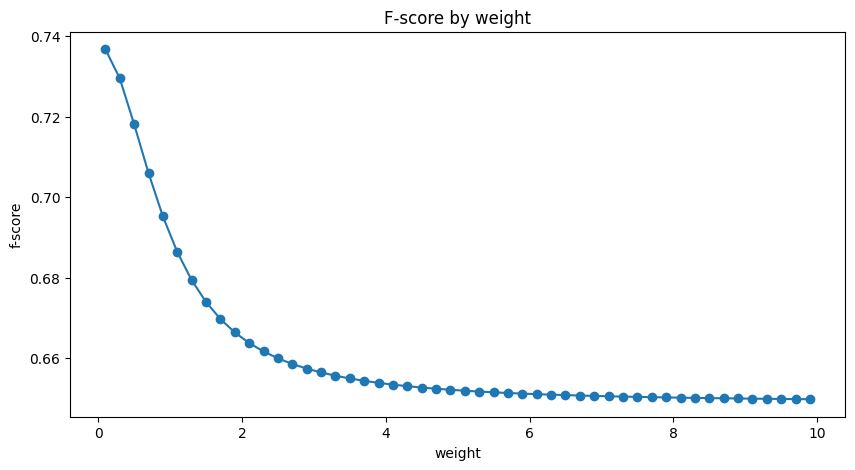

In [160]:
evaluate(y_test,y_pre,y_prob)
graph_f_score(0.1, 10, 0.2, y_test, y_pre)

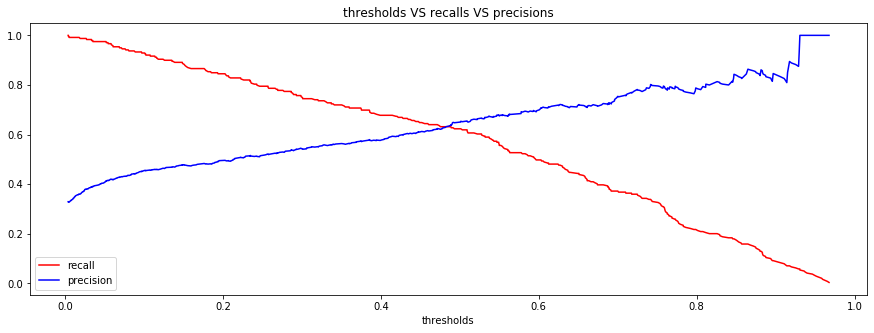

In [ ]:
precision_recall_thresholds(y_test, y_prob)

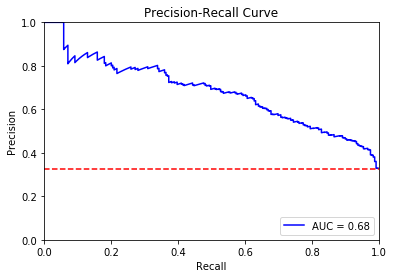

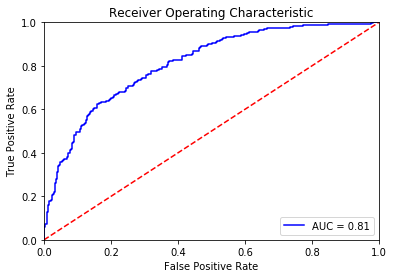

In [ ]:
plot_pr_curve(y_test, y_prob)
plot_roc_curve(y_test, y_prob)

#### 4-4-3. 최적의 매개변수 구하기

In [ ]:
param_grid = {'depth': [4, 7, 10],
              'iterations' : [5, 10],
              'learning_rate' : [0.03, 0.1, 0.15],
              'l2_leaf_reg': [1,4,9],
              'iterations': [300]
             }

grid = GridSearchCV(estimator = cb.CatBoostClassifier(), param_grid=param_grid, scoring=cri_score, verbose=1, n_jobs=-1, cv=5,)

grid_result = grid.fit(X_train, y_train, cat_features = cat_features)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test))) # 최적의 매개변수와 전체 train 데이터로 만든 모델로 평가한 점수

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 14.3min finished


0:	learn: 0.6798467	total: 14ms	remaining: 4.2s
1:	learn: 0.6666423	total: 19.6ms	remaining: 2.93s
2:	learn: 0.6560934	total: 24.8ms	remaining: 2.46s
3:	learn: 0.6451025	total: 30ms	remaining: 2.22s
4:	learn: 0.6353256	total: 35.3ms	remaining: 2.08s
5:	learn: 0.6253678	total: 40.9ms	remaining: 2s
6:	learn: 0.6176331	total: 46.2ms	remaining: 1.93s
7:	learn: 0.6098228	total: 51.4ms	remaining: 1.88s
8:	learn: 0.6016703	total: 56.6ms	remaining: 1.83s
9:	learn: 0.5942373	total: 62ms	remaining: 1.8s
10:	learn: 0.5872788	total: 66.2ms	remaining: 1.74s
11:	learn: 0.5810908	total: 71.5ms	remaining: 1.72s
12:	learn: 0.5757342	total: 75.7ms	remaining: 1.67s
13:	learn: 0.5703840	total: 80.9ms	remaining: 1.65s
14:	learn: 0.5647021	total: 87.9ms	remaining: 1.67s
15:	learn: 0.5604991	total: 92.6ms	remaining: 1.64s
16:	learn: 0.5553880	total: 98.3ms	remaining: 1.64s
17:	learn: 0.5513775	total: 105ms	remaining: 1.64s
18:	learn: 0.5470438	total: 110ms	remaining: 1.63s
19:	learn: 0.5430887	total: 117ms	r

163:	learn: 0.4488957	total: 885ms	remaining: 734ms
164:	learn: 0.4487201	total: 889ms	remaining: 728ms
165:	learn: 0.4485729	total: 893ms	remaining: 721ms
166:	learn: 0.4485363	total: 896ms	remaining: 714ms
167:	learn: 0.4484477	total: 900ms	remaining: 707ms
168:	learn: 0.4483018	total: 906ms	remaining: 702ms
169:	learn: 0.4481725	total: 913ms	remaining: 698ms
170:	learn: 0.4480854	total: 919ms	remaining: 693ms
171:	learn: 0.4479283	total: 924ms	remaining: 688ms
172:	learn: 0.4477141	total: 929ms	remaining: 682ms
173:	learn: 0.4475823	total: 937ms	remaining: 678ms
174:	learn: 0.4474521	total: 942ms	remaining: 673ms
175:	learn: 0.4473141	total: 947ms	remaining: 667ms
176:	learn: 0.4471879	total: 952ms	remaining: 662ms
177:	learn: 0.4470567	total: 958ms	remaining: 657ms
178:	learn: 0.4469192	total: 964ms	remaining: 652ms
179:	learn: 0.4468464	total: 970ms	remaining: 646ms
180:	learn: 0.4467278	total: 975ms	remaining: 641ms
181:	learn: 0.4465378	total: 980ms	remaining: 636ms
182:	learn: 

#### 4-4-4. 테스트

In [ ]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

model_box['catboost'] = evaluate(y_test, y_pred, y_prob)

Accuracy : 0.766565
Precision : 0.700000
Recall : 0.627451
F1 score : 0.661743
F1.5 score : 0.648119
F2 score : 0.640732
PR curve_auc score : 0.729829
ROC curve_auc score : 0.834801

Confusion Matrix : 
 [[224 133]
 [ 96 528]]


In [ ]:
model_box

,logistic,xgboost,lightgbm,catboost
accuracy,0.766565,0.668705,0.758410,0.766565
precision,0.673913,0.525559,0.687500,0.700000
recall,0.694678,0.921569,0.616246,0.627451
f1 score,0.684138,0.669379,0.649926,0.661743
f1.5 score,0.688154,0.748120,0.636546,0.648119
f2 score,0.690423,0.800876,0.629291,0.640732
pr_auc,0.700603,0.722972,0.726989,0.729829
roc_auc,0.828591,0.829381,0.832229,0.834801
